In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm
import matplotlib.patches as patches
from matplotlib.colors import LogNorm, Normalize
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MultipleLocator

from itertools import izip
from collections import namedtuple

In [2]:
# Show plots in the notebook
%matplotlib inline

In [3]:
# Reload modules properly
%load_ext autoreload
%autoreload

In [28]:
%config InlineBackend.figure_formats = 'png' # or PDF, but this will ~crash if plotting a lrage number of points due to vector nature
mpl.rcParams['savefig.dpi'] = 72  # or 300 for high quality

In [5]:
# Robin's helpful plotting functions
from common_plots import *
from common_strings import *

## Matplotlib

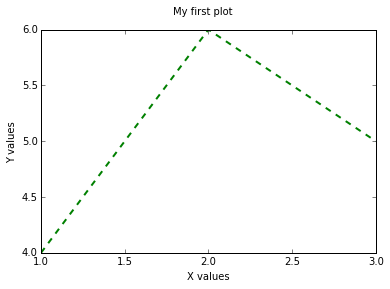

In [32]:
x = [1, 2, 3]
y = [4, 6, 5]
plt.plot(x, y, color='green', linestyle='dashed', linewidth=2)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.suptitle("My first plot")

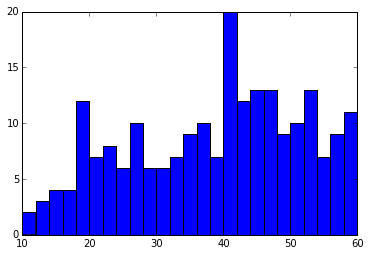

In [36]:
_ = plt.hist(df.ma1.values, bins=25, range=[10,60])

## Using pandas

In [6]:
with pd.HDFStore("points_5_test_3_Oct_15_03_Oct_16_1833_mini.h5") as store:
    df = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

In [25]:
type(df)

pandas.core.frame.DataFrame

In [10]:
import sys
sys.getsizeof(df)/1024.

627.9365234375

In [12]:
print "Number of points:", len(df.index)

Number of points: 224


In [13]:
df.head()

,Bra1bb,Bra1cc,Bra1gg,Bra1mumu,Bra1ss,Bra1tautau,Brh1a1a1,Brh1a1z,Brh1bb,Brh1cc,...,xsec_8_ggf_h2_2h1_2mu2tau,xsec_scaled_ggf_h2_2h1_4mu,xsec_8_ggf_h2_2h1_4mu,pass_del_a_mu,pass_bctaunu,pass_relic,pass_chi2bb,pass_chi2zz,pass_chi2gg,pass_cms4mu
0,0.922038,0.000981,0.007227,0.000247,0.000724,0.068771,0.090022,2.673094e-12,0.585068,0.027216,...,6.947462e-09,3.335105e-12,1.229653e-11,True,False,False,True,True,True,True
7,0.907112,0.000434,0.002943,0.000313,0.000711,0.088408,0.259267,NaN,0.476262,0.022510,...,5.919472e-09,3.095156e-12,1.047710e-11,True,False,False,True,False,True,True
12,0.919095,0.000891,0.006466,0.000260,0.000734,0.072538,0.572514,1.865156e-14,0.277208,0.012860,...,8.206163e-12,4.972424e-15,1.452445e-14,True,False,True,False,False,False,True
15,0.902315,0.000362,0.002432,0.000332,0.000722,0.093703,0.085493,NaN,0.558290,0.027115,...,3.666347e-08,1.947470e-11,6.488969e-11,True,False,False,True,True,True,True
18,0.911583,0.000679,0.004763,0.000292,0.000749,0.081900,0.001476,7.423093e-14,0.630338,0.029132,...,1.887306e-08,9.465408e-12,3.340342e-11,True,False,False,True,True,True,True


In [17]:
df.describe()

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Bra1bb,Bra1cc,Bra1gg,Bra1mumu,Bra1ss,Bra1tautau,Brh1a1a1,Brh1a1z,Brh1bb,Brh1cc,...,xsec_scaled_ggf_h2_2h1_4tau,xsec_8_ggf_h2_2h1_4tau,xsec_scaled_ggf_h2_2h1_2tau2mu,xsec_8_ggf_h2_2h1_2tau2mu,xsec_scaled_ggf_h2_2h1_2mu2b,xsec_8_ggf_h2_2h1_2mu2b,xsec_scaled_ggf_h2_2h1_2mu2tau,xsec_8_ggf_h2_2h1_2mu2tau,xsec_scaled_ggf_h2_2h1_4mu,xsec_8_ggf_h2_2h1_4mu
count,217.000000,224.000000,224.000000,224.000000,224.000000,224.000000,2.240000e+02,7.700000e+01,224.000000,224.000000,...,1.910000e+02,1.910000e+02,1.910000e+02,1.910000e+02,1.910000e+02,1.910000e+02,1.910000e+02,1.910000e+02,1.910000e+02,1.910000e+02
mean,0.907600,0.001004,0.007836,0.000388,0.001107,0.106288,2.501897e-01,2.649669e-10,0.463495,0.021539,...,4.277053e-07,1.910044e-06,3.028592e-09,1.353388e-08,2.787725e-08,1.265183e-07,3.028592e-09,1.353388e-08,5.361390e-12,2.397414e-11
std,0.049329,0.002561,0.022398,0.000532,0.002180,0.133889,2.525162e-01,1.713091e-09,0.156120,0.007475,...,1.600548e-06,7.873578e-06,1.133244e-08,5.583336e-08,1.041436e-07,5.325647e-07,1.133244e-08,5.583336e-08,2.005944e-11,9.898288e-11
min,0.191270,0.000083,0.000560,0.000069,0.000154,0.019610,9.170174e-07,1.050950e-15,0.047357,0.000174,...,3.730994e-17,1.089823e-16,2.641471e-19,7.715737e-19,2.419916e-18,7.068574e-18,2.641471e-19,7.715737e-19,4.675275e-22,1.365648e-21
25%,NaN,0.000441,0.002999,0.000277,0.000707,0.077452,3.003532e-02,NaN,0.365103,0.016629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000531,0.003654,0.000301,0.000719,0.084975,1.630495e-01,NaN,0.515988,0.024059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000755,0.005358,0.000315,0.000737,0.088773,4.122489e-01,NaN,0.589877,0.027586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.926333,0.022181,0.194280,0.003756,0.016357,0.910364,9.290572e-01,1.494236e-08,0.660185,0.031446,...,1.540888e-05,6.389648e-05,1.090895e-07,4.545611e-07,9.996757e-07,4.647245e-06,1.090895e-07,4.545611e-07,1.930790e-10,8.084396e-10


In [16]:
print df.columns.values

['Bra1bb' 'Bra1cc' 'Bra1gg' 'Bra1mumu' 'Bra1ss' 'Bra1tautau' 'Brh1a1a1'
 'Brh1a1z' 'Brh1bb' 'Brh1cc' 'Brh1gammagamma' 'Brh1gg' 'Brh1mumu'
 'Brh1tautau' 'Brh1ww' 'Brh1zgamma' 'Brh1zz' 'Brh2a1a1' 'Brh2a1z' 'Brh2bb'
 'Brh2gammagamma' 'Brh2gg' 'Brh2h1h1' 'Brh2tautau' 'Brh2ww' 'Brh2zgamma'
 'Brh2zz' 'Del_a_mu' 'HBchannel' 'HBobsratio' 'HBresult' 'HS_10_chi2'
 'HS_10_muPred' 'HS_11_chi2' 'HS_11_muPred' 'HS_12_chi2' 'HS_12_muPred'
 'HS_13_chi2' 'HS_13_muPred' 'HS_14_chi2' 'HS_14_muPred' 'HS_15_chi2'
 'HS_15_muPred' 'HS_16_chi2' 'HS_16_muPred' 'HS_17_chi2' 'HS_17_muPred'
 'HS_18_chi2' 'HS_18_muPred' 'HS_19_chi2' 'HS_19_muPred' 'HS_1_chi2'
 'HS_1_muPred' 'HS_20_chi2' 'HS_20_muPred' 'HS_21_chi2' 'HS_21_muPred'
 'HS_22_chi2' 'HS_22_muPred' 'HS_23_chi2' 'HS_23_muPred' 'HS_24_chi2'
 'HS_24_muPred' 'HS_25_chi2' 'HS_25_muPred' 'HS_26_chi2' 'HS_26_muPred'
 'HS_27_chi2' 'HS_27_muPred' 'HS_28_chi2' 'HS_28_muPred' 'HS_29_chi2'
 'HS_29_muPred' 'HS_2_chi2' 'HS_2_muPred' 'HS_30_chi2' 'HS_30_muPred'
 'HS_31_

In [20]:
# Print the 2nd entry - this represents one scan point
df.iloc[2]

Bra1bb                               0.919095
Bra1cc                            0.000891161
Bra1gg                             0.00646564
Bra1mumu                          0.000259892
Bra1ss                            0.000733548
Bra1tautau                          0.0725378
Brh1a1a1                             0.572514
Brh1a1z                           1.86516e-14
Brh1bb                               0.277208
Brh1cc                              0.0128601
Brh1gammagamma                     0.00103954
Brh1gg                              0.0255732
Brh1mumu                          0.000107082
Brh1tautau                            0.03025
Brh1ww                              0.0722327
Brh1zgamma                        0.000597796
Brh1zz                             0.00741224
Brh2a1a1                             0.756587
Brh2a1z                            1.1969e-07
Brh2bb                            0.000212567
Brh2gammagamma                    1.78052e-06
Brh2gg                            

In [24]:
# Print the entries in column ma1
df.ma1
# or could use df['ma1']

0      19.350992
7      49.941397
12     21.887306
15     59.807967
18     30.527311
21     53.619821
29     42.932589
35     39.746472
42     18.511953
59     51.679663
60     40.521646
63     42.626238
64     40.978731
69     58.431902
70     28.454198
80     35.785986
82     54.797675
84     14.412945
91     42.051379
94      7.761180
97     41.280470
102    51.503458
108    43.985070
109    30.244392
110    47.185358
111    56.285068
112    32.010226
113    39.152519
114    16.809670
118    29.345610
         ...    
790    22.415178
796    39.483015
799    48.131096
806    10.141532
815    51.915048
816    52.534334
817    21.477898
829    46.716107
836    46.474528
844    32.739479
853    35.639822
856    13.598722
862    31.292670
869    43.652285
878    39.242489
886    45.028826
888    33.661450
890    33.660989
895    26.327126
898    18.813018
903    31.587605
909    42.678501
913    18.410197
928    45.752386
934     9.901449
944     8.004173
946    12.353036
947     6.4917

In [26]:
type(df.ma1)

pandas.core.series.Series

In [38]:
# Filter 
df.query('ma1 < 20').ma1

0      19.350992
42     18.511953
84     14.412945
94      7.761180
114    16.809670
120    19.237680
141    17.467915
206    12.223676
349    19.123481
361    19.596845
362     8.424382
389    15.469734
471    19.214722
550    18.254128
652    14.785911
658     9.183918
682    19.990198
691    14.083930
695    16.553313
705    10.899370
729    19.548169
731    17.751627
806    10.141532
856    13.598722
898    18.813018
913    18.410197
934     9.901449
944     8.004173
946    12.353036
947     6.491751
950    18.768417
Name: ma1, dtype: float64

In [41]:
# alternately, use a mask
print df.ma1<20

0       True
7      False
12     False
15     False
18     False
21     False
29     False
35     False
42      True
59     False
60     False
63     False
64     False
69     False
70     False
80     False
82     False
84      True
91     False
94      True
97     False
102    False
108    False
109    False
110    False
111    False
112    False
113    False
114     True
118    False
       ...  
790    False
796    False
799    False
806     True
815    False
816    False
817    False
829    False
836    False
844    False
853    False
856     True
862    False
869    False
878    False
886    False
888    False
890    False
895    False
898     True
903    False
909    False
913     True
928    False
934     True
944     True
946     True
947     True
950     True
951    False
Name: ma1, dtype: bool


In [42]:
df[df.ma1<20]

,Bra1bb,Bra1cc,Bra1gg,Bra1mumu,Bra1ss,Bra1tautau,Brh1a1a1,Brh1a1z,Brh1bb,Brh1cc,...,xsec_8_ggf_h2_2h1_2mu2tau,xsec_scaled_ggf_h2_2h1_4mu,xsec_8_ggf_h2_2h1_4mu,pass_del_a_mu,pass_bctaunu,pass_relic,pass_chi2bb,pass_chi2zz,pass_chi2gg,pass_cms4mu
0,0.922038,0.000981,0.007227,0.000247,0.000724,0.068771,0.090022,2.673094e-12,0.585068,0.027216,...,6.947462e-09,3.335105e-12,1.229653e-11,True,False,False,True,True,True,True
42,0.924282,0.001021,0.007555,0.000238,0.000708,0.066183,0.224046,1.469761e-10,0.504582,0.023085,...,8.353622e-12,5.061771e-15,1.478543e-14,False,False,False,True,False,True,True
84,0.926333,0.001224,0.009459,0.000226,0.000728,0.062026,0.929057,NaN,0.064076,0.000174,...,NaN,NaN,NaN,False,False,False,True,True,True,True
94,NaN,0.006838,0.064553,0.003619,0.014611,0.910364,0.061981,5.150690e-11,0.550085,0.026125,...,NaN,NaN,NaN,True,False,False,True,True,True,True
114,0.923176,0.001088,0.008183,0.000241,0.000737,0.066568,0.297354,1.454757e-10,0.410403,0.019640,...,2.728891e-09,1.410108e-12,4.829619e-12,True,False,False,True,False,False,True
120,0.922088,0.000985,0.007264,0.000247,0.000725,0.068680,0.000874,6.747523e-11,0.589829,0.028229,...,NaN,NaN,NaN,True,False,False,True,True,True,True
141,0.924176,0.001059,0.007921,0.000236,0.000714,0.065413,0.014071,3.473721e-14,0.597311,0.027742,...,7.224909e-17,4.377596e-20,1.278696e-19,True,False,False,True,True,True,True
206,0.923758,0.001397,0.011194,0.000231,0.000787,0.062629,0.492182,3.438229e-10,0.325639,0.014853,...,8.369360e-10,4.355508e-13,1.481308e-12,False,False,True,False,False,False,True
349,0.917590,0.000983,0.007259,0.000263,0.000773,0.073110,0.378161,8.763981e-13,0.359900,0.016909,...,3.895821e-13,2.360422e-16,6.894792e-16,True,False,False,True,False,False,True
361,0.921693,0.000972,0.007147,0.000249,0.000726,0.069203,0.366999,1.028399e-10,0.368280,0.017161,...,2.331618e-11,1.228486e-14,4.126485e-14,False,False,False,True,False,False,True
